# A Problem
Coins are in the denomination of $1,2$. Suppose a person has $100$ rupees and has $60$ coins in total. How many coins of each denomination the person has?

The above problem statement can be solved using linear algebra.

Lets say we have $x,y$ coins of denominations $1,2$ respectively.
So $$x+2y=100$$ also the number of coins is $60$ so $$x+y=60$$
and this reduces to a simple algebra problem. Can be solved by:
- using graphical approach that would involve drawing the two equations as a straight line and finding the meeting point.
- using elimination technique
- cramer's rule, and so on $\cdots$

In [2]:
# new library
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#x+2y=100 is satisfied by (0,50) and (100,0)
#x+y=60 is satisfied by (0,60) and (60,0)
df=pd.DataFrame({"x1":[0,100],"y1":[50,0],"x2":[0,60],"y2":[60,0]}) #so its better to use csv file and import
print(df)

    x1  y1  x2  y2
0    0  50   0  60
1  100   0  60   0


In [3]:
#x+2y=100 is satisfied by (0,50) and (100,0)
#x+y=60 is satisfied by (0,60) and (60,0)
pd.DataFrame({"x1":[0,100],"y1":[50,0],"x2":[0,60],"y2":[60,0]}) #so its better to use csv file and import


,x1,y1,x2,y2
0,0,50,0,60
1,100,0,60,0


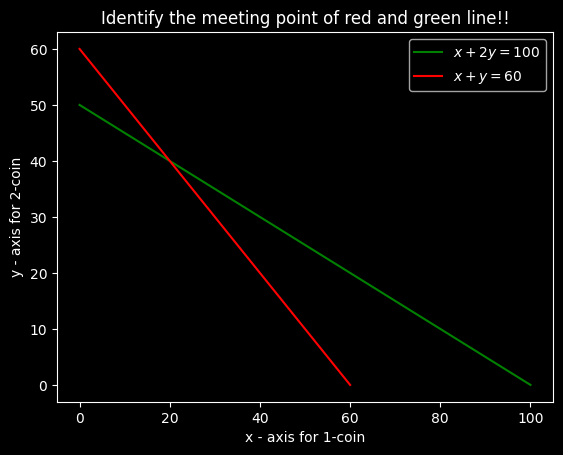

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
x1=[0,100] 
y1=[50,0] 
x2=[0,60]
y2=[60,0]
plt.plot(x1, y1,color='green',label='$x+2y=100$') 
plt.plot(x2,y2,color='red',label='$x+y=60$') 
plt.xlabel('x - axis for 1-coin') 
plt.ylabel('y - axis for 2-coin') 
plt.title('Identify the meeting point of red and green line!!') 
plt.legend()
plt.show() 


One can easily observe the meeting point at (20,40) which is clear that we need 20 numbers of 1 rupees coin and 40 numbers of 2 rupees coin.

# matrix method
$$x+2y=100\\ x+y=60$$
can be written as:
$$\begin{pmatrix}
1 & 2\\
1&1
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
=\begin{pmatrix}
100\\
60
\end{pmatrix}$$

**Note:** there are more methods related to matrix which would be discussed sebsequently.

In [8]:
# it's easier to find matrix inerse using numpy
import numpy as np
a=np.array([[1,2],[1,1]])
b=np.array([[100],[60]])
a_inv=np.linalg.inv(a)
#print(a_inv)
np.dot(a_inv,b)

array([[20.],
       [40.]])

In [ ]:
# its easily visible we need 20 1-coins and 40-2 coins as solution

In [4]:
# Import required package
import numpy as np

# Taking a 3 * 3 matrix
A = np.array([[1, 2],[1,1]])

# Calculating the inverse of the matrix
print(np.linalg.inv(A))


[[-1.  2.]
 [ 1. -1.]]


So very often it is useful to make plots for 2 variable, like in example of our case but o really find solutions when the number of variables are more than 3 we would prefer getting solution by using calculations from matrices.

# System of equations
Consider the system of linear equations:
$$a_{11} x_1+a_{12}x_2+\cdots a_{1m}x_m=b_1\\a_{21} x_1+a_{22}x_2+\cdots a_{2m}x_m=b_2\\ \cdots\\_{n1} x_1+a_{n2}x_2+\cdots a_{nm}x_m=b_n$$
The above is a matrix multiplication and often denoted as $$A X=B$$
or, $$\begin{bmatrix}a_{11}&a_{12}&\cdots a_{1m}\\a_{21}&a_{22}&\cdots a_{2m}\\\cdots&\cdots&\cdots\\a_{n1}&a_{n2}&\cdots a_{nm}\end{bmatrix}\begin{bmatrix}x_1\\x_2\\ \cdots\\ x_m\end{bmatrix}=\begin{bmatrix}b_1\\b_2\\ \cdots \\ b_n\end{bmatrix}$$

## Gaussian elimination
- This is an algorithm to solve system of linear equations.
- From matrix we need to find the row echolon form.
- We can do either row reduction or column reduction, not both simultaneously.

For example consider the system of equations $$ 7x + y + 5z = 27\\
4x+  3y + 5z = 21\\
6x + y + 2z = 9$$

The matrix representation is $$\begin{bmatrix} 7&1&5\\4&3&5\\6&1&2\end{bmatrix} 
\begin{bmatrix}x\\ y\\ z \end{bmatrix}=
\begin{bmatrix}27\\21\\9\end{bmatrix}\\
AX=B$$


Now considering $[A|B]$ we can reduce it as:
$$\begin{bmatrix} 7&1&5&27\\4&3&5&21\\6&1&2&9\end{bmatrix} $$
$$\begin{bmatrix} 1&0&\frac{10}{17}&\frac{60}{17}\\0&1&\frac{15}{17}&\frac{39}{17}\\0&0&-\frac{41}{17}&-\frac{246}{17}\end{bmatrix}$$


Clearly from above we can get values as:
    $$x=0\\ y=-3\\  z=6$$

In [3]:
##For Gauss Jordan elimination linalg.solve() will be useful to solve in numpy
import numpy as np
A=np.array([[7,1,5],[4,3,5],[6,1,2]])
B=np.array([[27],[21],[9]])
C=np.linalg.solve(A,B)
print(C)

[[ 0.]
 [-3.]
 [ 6.]]


## Elementary operations
- These are some specific rules associsted with playing with rows and columns of matrices.
- Rows/columns can be interchanged among them
- any row can be scaled by some factor $\alpha$. For instance $\begin{bmatrix}2&2\\ 6&8\end{bmatrix}$ can be modified as $\begin{bmatrix}10&10\\ 6&8\end{bmatrix}$ where the first row is scaled by factor $5$.
- A row can be added to any other row.
- Similar rules follow for columns.
- We can use elementary operations in identity matrices and then multiply matrix with it in order to obtain the desired elementary operation.
- For instance we have the identity matrix $\begin{bmatrix}1&0\\ 0&1\end{bmatrix}$ and we would apply scaling of row 1 by factor $5$ to obtain, $\begin{bmatrix}5&0\\ 0&1\end{bmatrix}$. Now $\begin{bmatrix}5&0\\ 0&5\end{bmatrix}\begin{bmatrix}2&2\\ 6&8\end{bmatrix}=\begin{bmatrix}10&10\\ 6&8\end{bmatrix}$
- Now to obtain column operation we need to multiply modified identity matrix in right side and for row operation it has to be done in left side.
